# Competição ML @SBS/DAA - Edição 2021/2022

## Trabalho Prático de Grupo - Previsão do fluxo de tráfego rodoviário

#### A modelação do fluxo de tráfego rodoviário é um conhecido problema de características estocásticas, não-lineares. Tem, contudo, aparecido na literatura um conjunto de modelos que demonstram um potencial assinalável neste tipo de previsões. Com isso em consideração, foi construído um dataset que contém dados referentes ao tráfego de veículos na cidade do Porto durante um período superior a 1 ano. O dataset cobre um período que vai desde o dia 24 de julho de 2018 até ao dia 02 de outubro de 2019.

#### Com esta competição espera-se que os alunos desenvolvam e otimizem modelos de Machine Learning que sejam capazes de prever o fluxo de tráfego rodoviário, numa determinada hora, na cidade do Porto.

### Grupo-02

![Header](header.png)

<img align="right" src="umdi.png"> 

## Importar librarias

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
%matplotlib inline

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #mutilayer perceptor
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.3.0


## Ler dataset

In [80]:
training_data = pd.read_csv("training_data.csv", encoding='latin-1')
test_data = pd.read_csv("test_data.csv", encoding='latin-1')

## Analisar o dataset

#### Vamos ver as features que o dataset tem

In [81]:
training_data.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

#### Vamos ver que tipo de dados estão nas features e se existe missing data

In [82]:
training_data.info()
print(training_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
city_name                  6812 non-null object
record_date                6812 non-null object
AVERAGE_SPEED_DIFF         6812 non-null object
AVERAGE_FREE_FLOW_SPEED    6812 non-null float64
AVERAGE_TIME_DIFF          6812 non-null float64
AVERAGE_FREE_FLOW_TIME     6812 non-null float64
LUMINOSITY                 6812 non-null object
AVERAGE_TEMPERATURE        6812 non-null float64
AVERAGE_ATMOSP_PRESSURE    6812 non-null float64
AVERAGE_HUMIDITY           6812 non-null float64
AVERAGE_WIND_SPEED         6812 non-null float64
AVERAGE_CLOUDINESS         4130 non-null object
AVERAGE_PRECIPITATION      6812 non-null float64
AVERAGE_RAIN               563 non-null object
dtypes: float64(8), object(6)
memory usage: 745.2+ KB
city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0




### O dataset tem 13 features e duas colunas com missing data (AVERAGE_CLOUDINESS e AVERAGE_RAIN )


In [83]:
test_data.info()
print(test_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
city_name                  1500 non-null object
record_date                1500 non-null object
AVERAGE_FREE_FLOW_SPEED    1500 non-null float64
AVERAGE_TIME_DIFF          1500 non-null float64
AVERAGE_FREE_FLOW_TIME     1500 non-null float64
LUMINOSITY                 1500 non-null object
AVERAGE_TEMPERATURE        1500 non-null float64
AVERAGE_ATMOSP_PRESSURE    1500 non-null float64
AVERAGE_HUMIDITY           1500 non-null float64
AVERAGE_WIND_SPEED         1500 non-null float64
AVERAGE_CLOUDINESS         901 non-null object
AVERAGE_PRECIPITATION      1500 non-null float64
AVERAGE_RAIN               140 non-null object
dtypes: float64(8), object(5)
memory usage: 152.5+ KB
city_name                     0
record_date                   0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATU

### O mesmo aplica-se a test_data

#### Vamos ver a destribuição dos valores

### Podemos ver que existe uma forte correlação entre AVERAGE_SPEED_DIFF e AVERAGE_TIME_DIFF

<function matplotlib.pyplot.show(*args, **kw)>

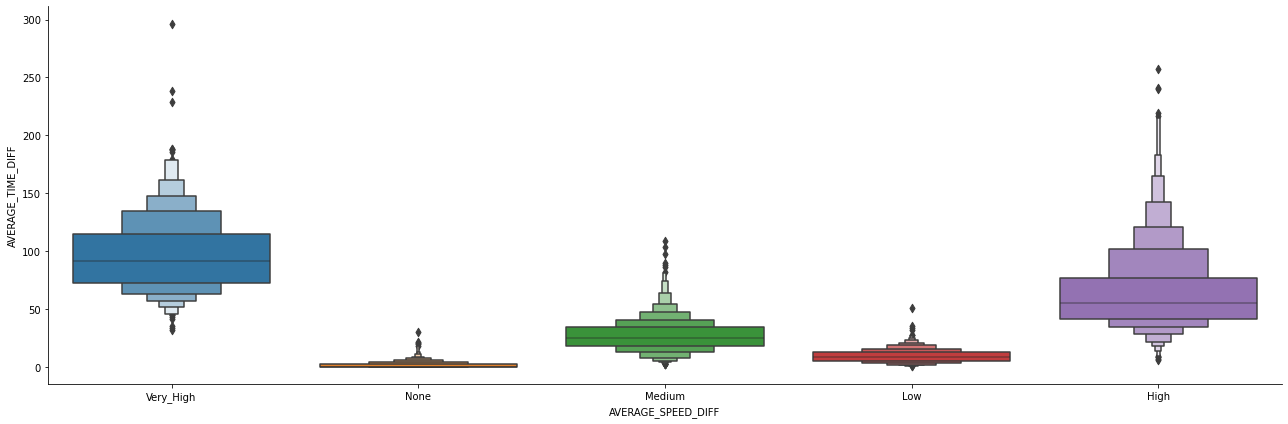

In [84]:
sns.catplot(y='AVERAGE_TIME_DIFF',x='AVERAGE_SPEED_DIFF',data= training_data.sort_values('AVERAGE_SPEED_DIFF',ascending=False),kind="boxen",height=6, aspect=3,)
plt.show

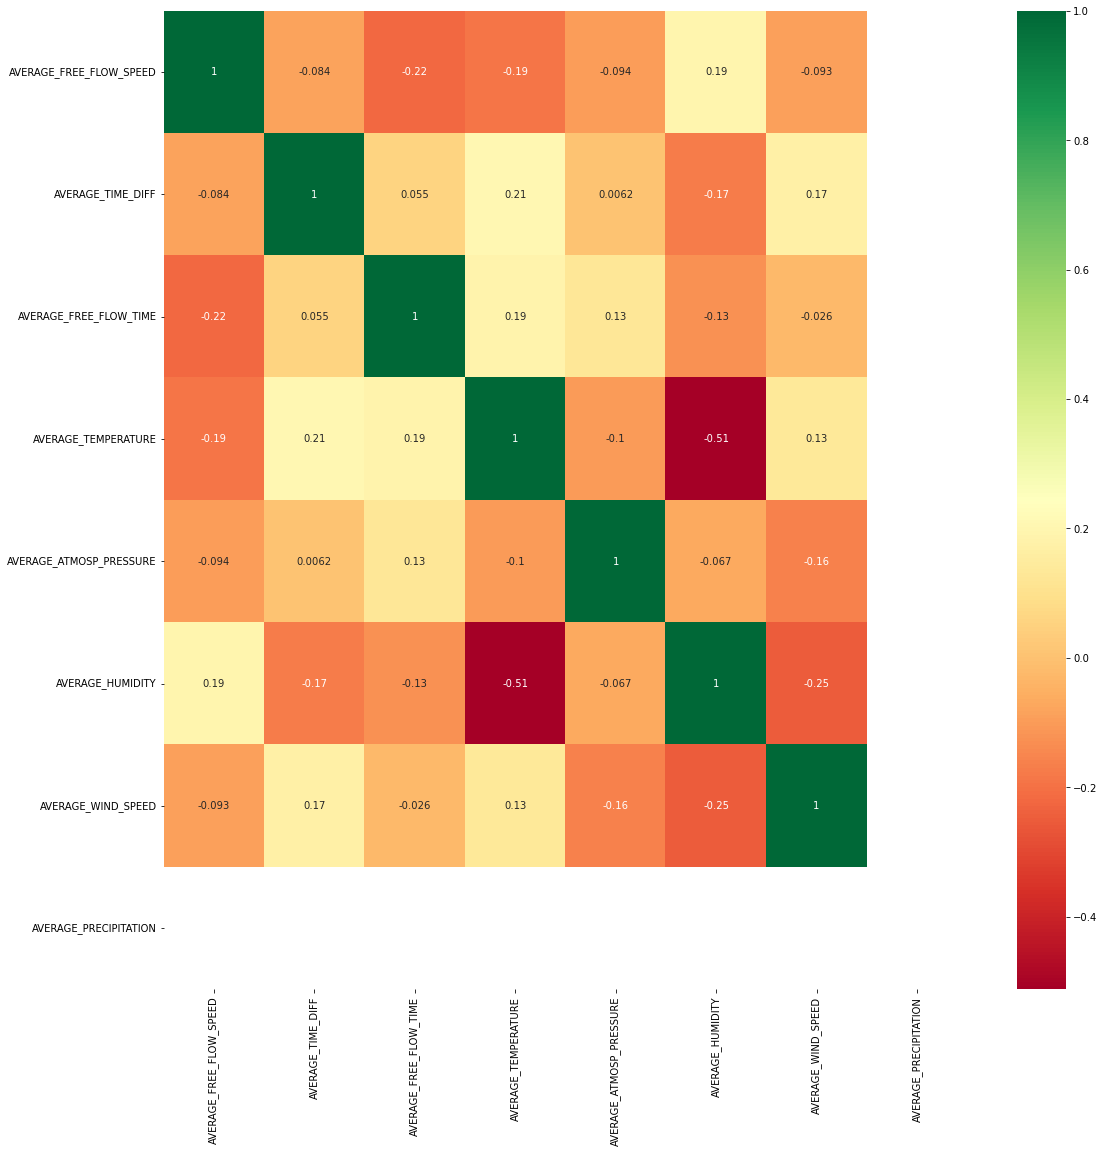

In [85]:
plt.figure(figsize=(18,18))
sns.heatmap(training_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

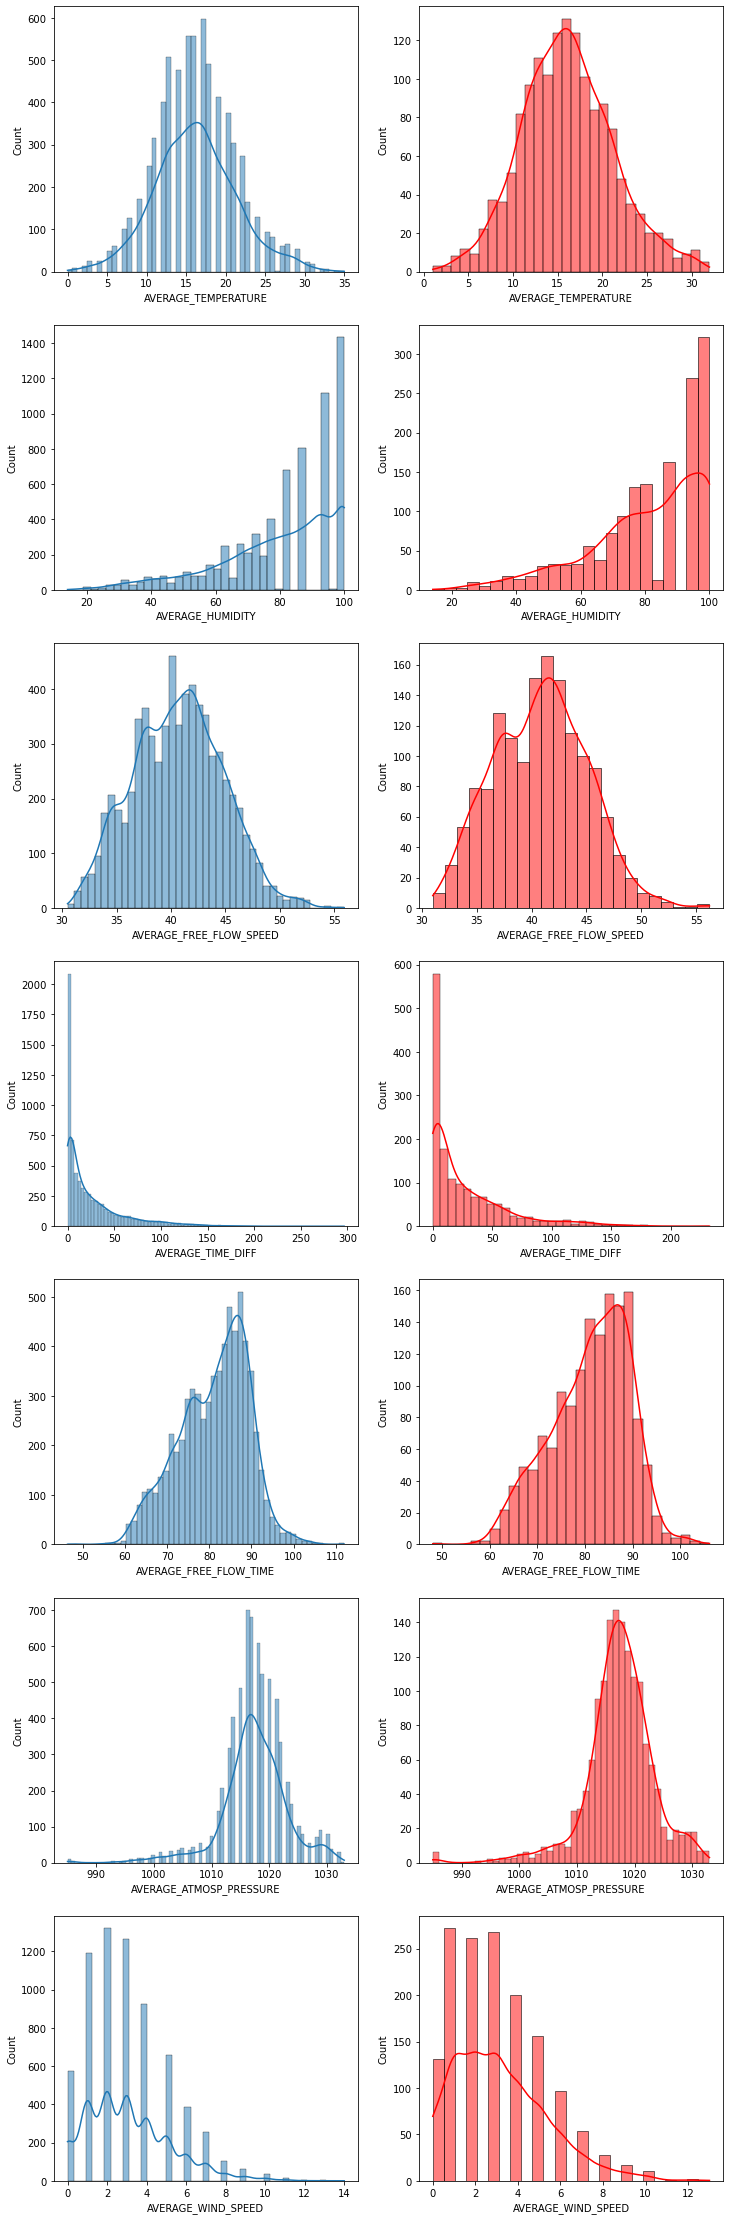

In [86]:
fig, axs = plt.subplots(7,2)

sns.histplot(training_data['AVERAGE_TEMPERATURE'], kde=True,ax=axs[0][0])
sns.histplot(test_data['AVERAGE_TEMPERATURE'], kde=True,ax=axs[0][1],color='red')

sns.histplot(training_data['AVERAGE_HUMIDITY'], kde=True,ax=axs[1][0])
sns.histplot(test_data['AVERAGE_HUMIDITY'], kde=True,ax=axs[1][1],color='red')

sns.histplot(training_data['AVERAGE_FREE_FLOW_SPEED'], kde=True,ax=axs[2][0])
sns.histplot(test_data['AVERAGE_FREE_FLOW_SPEED'], kde=True,ax=axs[2][1],color='red')

sns.histplot(training_data['AVERAGE_TIME_DIFF'], kde=True,ax=axs[3][0])
sns.histplot(test_data['AVERAGE_TIME_DIFF'], kde=True,ax=axs[3][1],color='red')

sns.histplot(training_data['AVERAGE_FREE_FLOW_TIME'], kde=True,ax=axs[4][0])
sns.histplot(test_data['AVERAGE_FREE_FLOW_TIME'], kde=True,ax=axs[4][1],color='red')

sns.histplot(training_data['AVERAGE_ATMOSP_PRESSURE'], kde=True,ax=axs[5][0])
sns.histplot(test_data['AVERAGE_ATMOSP_PRESSURE'], kde=True,ax=axs[5][1],color='red')

sns.histplot(training_data['AVERAGE_WIND_SPEED'], kde=True,ax=axs[6][0])
sns.histplot(test_data['AVERAGE_WIND_SPEED'], kde=True,ax=axs[6][1],color='red')


fig.set_size_inches(12, 40)
plt.show()


#### Vamos ver algumas boxplots

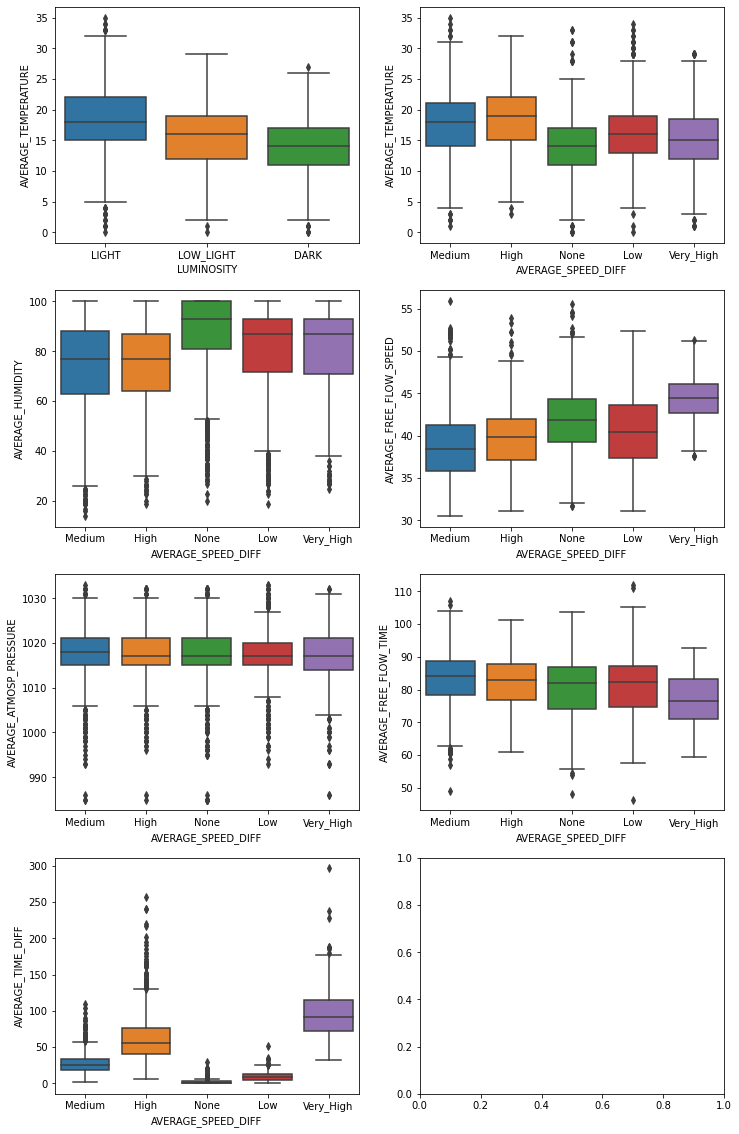

In [87]:
fig, axs = plt.subplots(4,2)

sns.boxplot(x=training_data["LUMINOSITY"], y=training_data["AVERAGE_TEMPERATURE"],ax=axs[0][0])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_TEMPERATURE"],ax=axs[0][1])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_HUMIDITY"],ax=axs[1][0])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_FREE_FLOW_SPEED"],ax=axs[1][1])

sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_ATMOSP_PRESSURE"],ax=axs[2][0])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_FREE_FLOW_TIME"],ax=axs[2][1])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_TIME_DIFF"],ax=axs[3][0])

fig.set_size_inches(12, 20)
plt.show()


#### Scatter plots

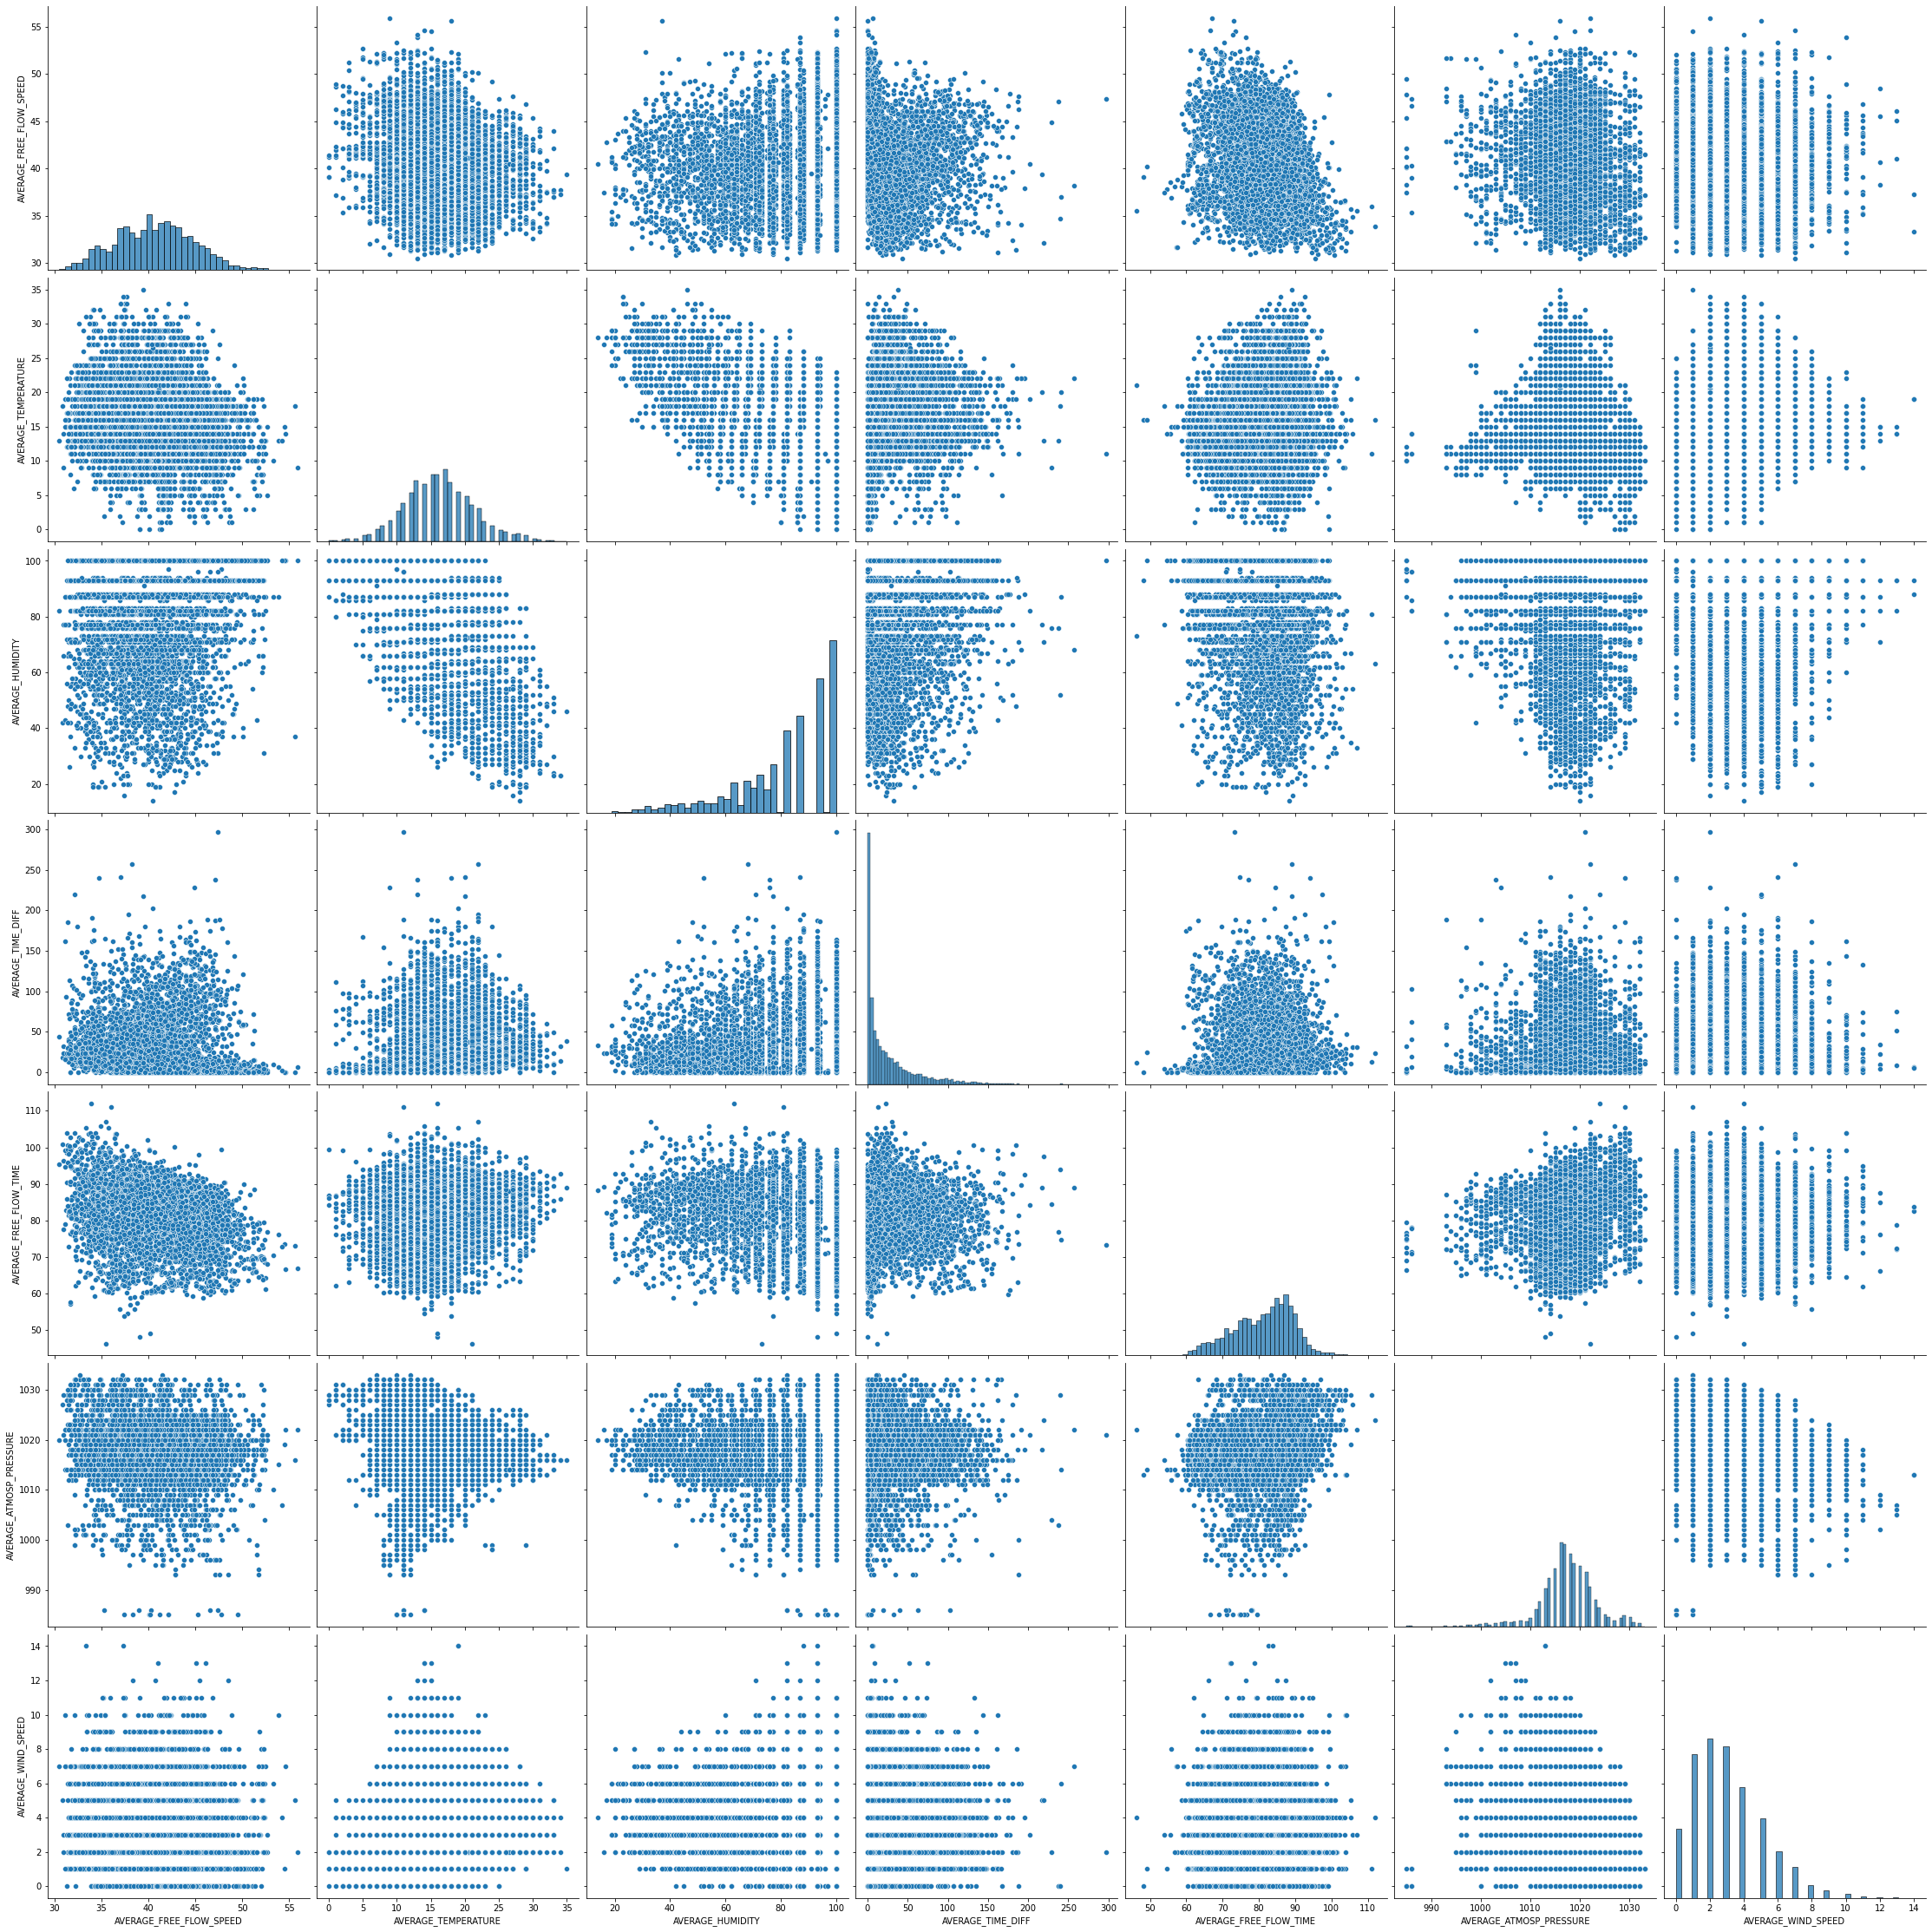

In [88]:
cols = ['AVERAGE_FREE_FLOW_SPEED','AVERAGE_TEMPERATURE', 'AVERAGE_HUMIDITY', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_WIND_SPEED','LUMINOSITY']
_ = sns.pairplot(training_data[cols], height = 4.5)

#### Correlation Matrix

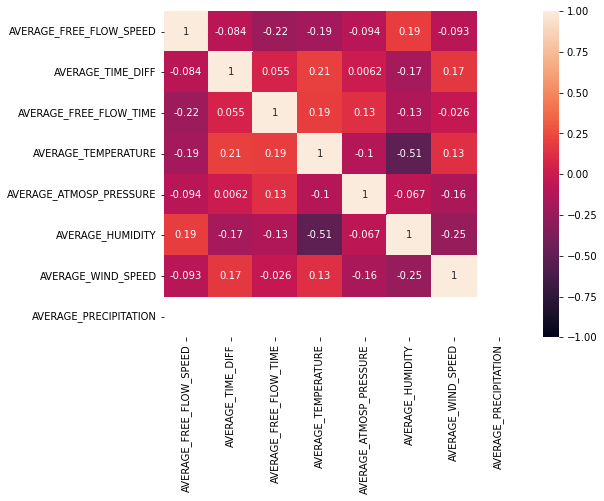

In [89]:
corr_matrix = training_data.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=False, annot=True);

## Preparar o dataset

#### Fazer drop das features desnecessarias

In [90]:
#City name é sempre porto logo pode-se fazer drop
#Drop
training_data = training_data.drop(['city_name'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)
#Average percipitation é sempre 0 logo pode-se fazer drop
#training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)
#test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

# Melhorar os dados de precipitação dando merge com um outro dataset.

In [91]:
precipitation_data = pd.read_csv("precipitationPortoHora.csv", encoding='latin-1')

In [92]:
precipitation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 5 columns):
YEAR                     10416 non-null int64
MO                       10416 non-null int64
DY                       10416 non-null int64
HR                       10416 non-null int64
AVERAGE_PRECIPITATION    10416 non-null float64
dtypes: float64(1), int64(4)
memory usage: 407.0 KB


In [93]:
training_data.drop(columns='AVERAGE_PRECIPITATION', inplace=True)
test_data.drop(columns='AVERAGE_PRECIPITATION', inplace=True)

In [94]:
training_data['DAY'] = pd.DatetimeIndex(training_data['record_date']).day
training_data['MONTH'] = pd.DatetimeIndex(training_data['record_date']).month
training_data['YEAR'] = pd.DatetimeIndex(training_data['record_date']).year
training_data['HOUR'] = pd.DatetimeIndex(training_data['record_date']).hour

test_data['DAY'] = pd.DatetimeIndex(test_data['record_date']).day
test_data['MONTH'] = pd.DatetimeIndex(test_data['record_date']).month
test_data['YEAR'] = pd.DatetimeIndex(test_data['record_date']).year
test_data['HOUR'] = pd.DatetimeIndex(test_data['record_date']).hour

In [95]:
training_data = pd.merge(training_data, precipitation_data , how = 'left', left_on=['DAY','MONTH','YEAR', 'HOUR'], right_on=['DY', 'MO', 'YEAR', 'HR'])

test_data = pd.merge(test_data, precipitation_data , how = 'left', left_on=['DAY','MONTH','YEAR', 'HOUR'], right_on=['DY', 'MO', 'YEAR', 'HR'])

In [96]:
training_data.drop(columns=['DAY','MONTH','YEAR', 'HOUR', 'DY', 'MO', 'YEAR', 'HR'], inplace=True)

test_data.drop(columns=['DAY','MONTH','YEAR', 'HOUR', 'DY', 'MO', 'YEAR', 'HR'], inplace=True)

#### Usar boxplots para ver outliers

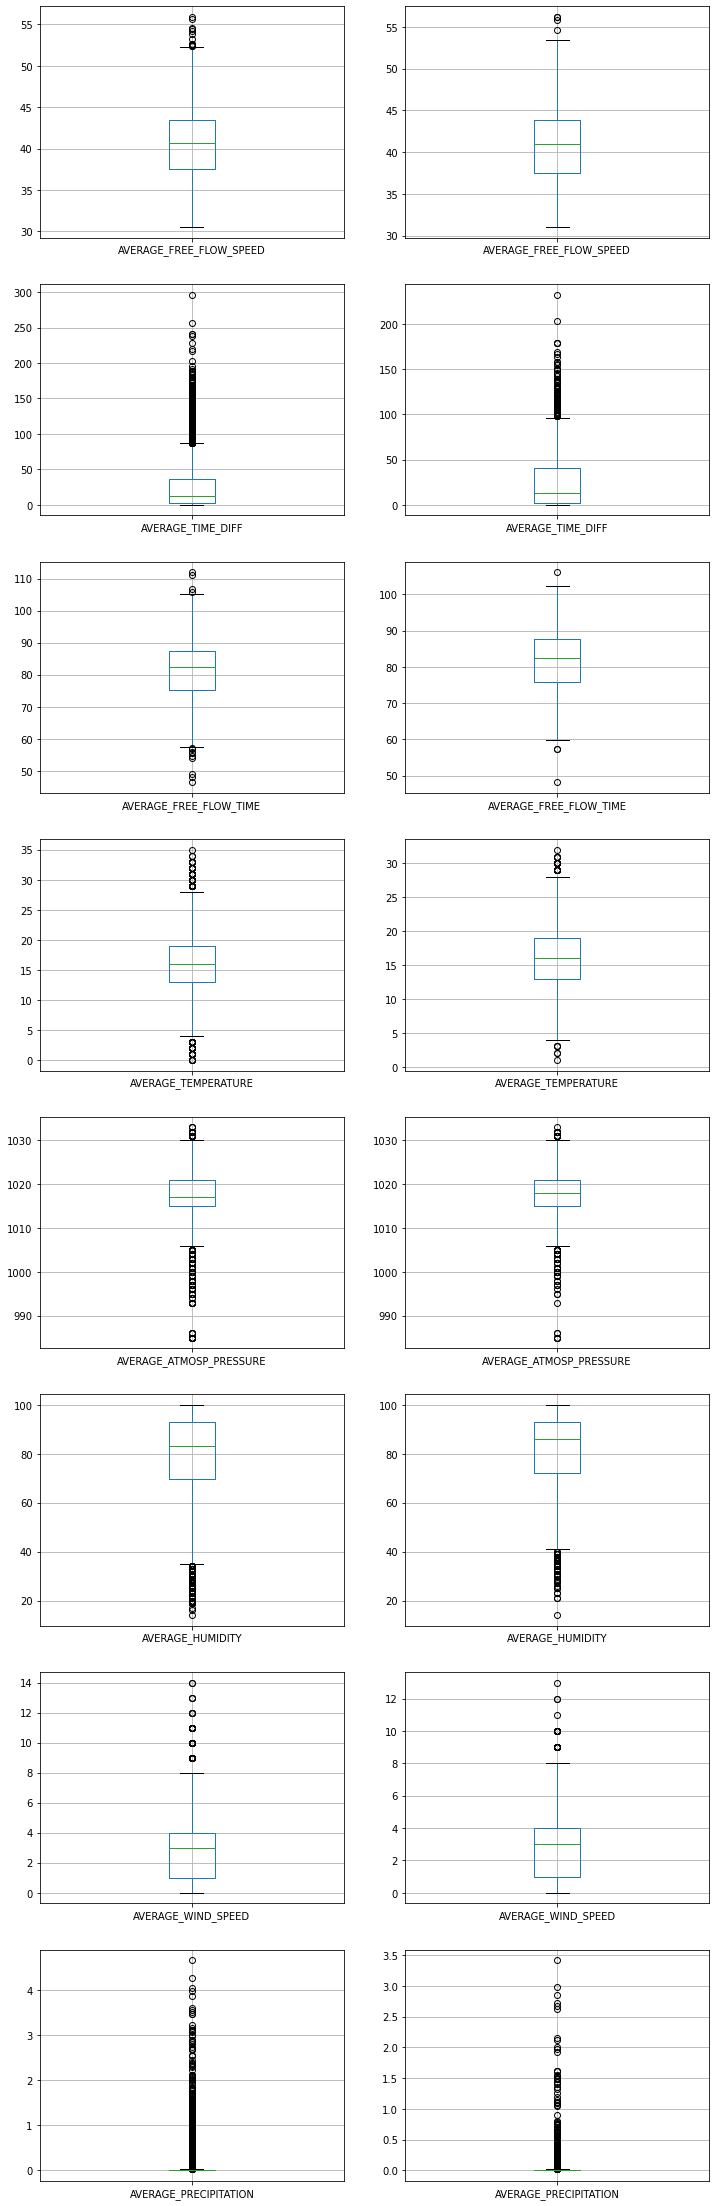

In [102]:
fig, axs = plt.subplots(8,2)
#plt.figure(fig=(18,18))
training_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][1])#,color='red')

training_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][0])
test_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][1])#,color='red')

training_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][1])#,color='red')

training_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][0])
test_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][1])#,color='red')

training_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][0])
test_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][1])#,color='red')

training_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][0])
test_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][1])#,color='red')

training_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][0])
test_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][1])#,color='red')

training_data.boxplot(column='AVERAGE_PRECIPITATION', ax=axs[7][0])
test_data.boxplot(column='AVERAGE_PRECIPITATION', ax=axs[7][1])#,color='red')

fig.set_size_inches(12, 40)
plt.show()

### Remover outliers

In [103]:
#Remover outliers da training_data
training_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(training_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
training_data['AVERAGE_TIME_DIFF']=winsorize(training_data['AVERAGE_TIME_DIFF'],(0.01,0.08))
training_data['AVERAGE_FREE_FLOW_TIME']=winsorize(training_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
training_data['AVERAGE_TEMPERATURE']=winsorize(training_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
training_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(training_data['AVERAGE_ATMOSP_PRESSURE'],(0.02,0.02))
#training_data['AVERAGE_HUMIDITY']=winsorize(training_data['AVERAGE_HUMIDITY'],(0.03,0.02))
training_data['AVERAGE_WIND_SPEED']=winsorize(training_data['AVERAGE_WIND_SPEED'],(0.01,0.02))
#Remover outlier das testing_data
test_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(test_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.1))
test_data['AVERAGE_TIME_DIFF']=winsorize(test_data['AVERAGE_TIME_DIFF'],(0.01,0.08))
test_data['AVERAGE_FREE_FLOW_TIME']=winsorize(test_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
test_data['AVERAGE_TEMPERATURE']=winsorize(test_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
test_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(test_data['AVERAGE_ATMOSP_PRESSURE'],(0.02,0.02))
#test_data['AVERAGE_HUMIDITY']=winsorize(test_data['AVERAGE_HUMIDITY'],(0.03,0.01))
test_data['AVERAGE_WIND_SPEED']=winsorize(test_data['AVERAGE_WIND_SPEED'],(0.01,0.04))


### Averiguar se os outliers foram resolvidos

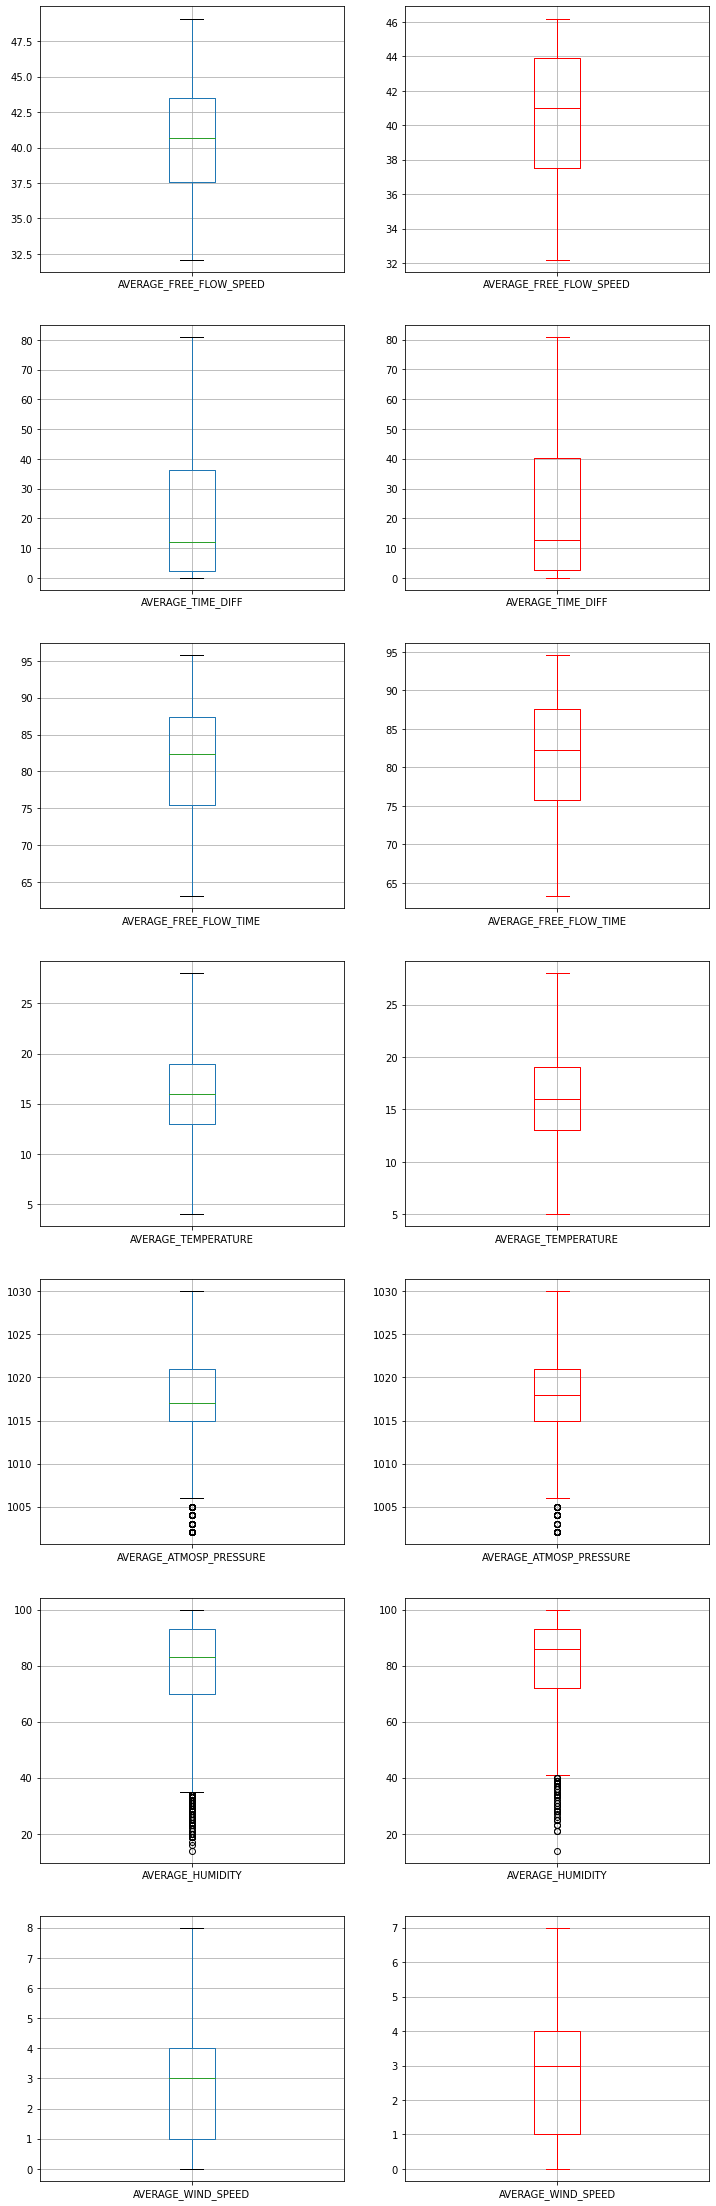

In [16]:
fig, axs = plt.subplots(7,2)
#plt.figure(fig=(18,18))
training_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][1],color='red')

training_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][0])
test_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][1],color='red')

training_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][1],color='red')

training_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][0])
test_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][1],color='red')

training_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][0])
test_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][1],color='red')

training_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][0])
test_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][1],color='red')

training_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][0])
test_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][1],color='red')

fig.set_size_inches(12, 40)
plt.show()

### Normalizar os datasets

In [104]:
#Precisamos de escalar certos valores para 0-1
training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
training_data['AVERAGE_PRECIPITATION'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_PRECIPITATION']).reshape(-1,1))

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data['AVERAGE_PRECIPITATION'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_PRECIPITATION']).reshape(-1,1))

In [105]:
training_data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_PRECIPITATION
0,2019-08-29 07:00:00,Medium,0.552941,0.141800,0.253823,LIGHT,0.458333,0.607143,1.000000,0.375,NaN,NaN,0.00000
1,2018-08-10 14:00:00,High,0.564706,0.595561,0.743119,LIGHT,0.708333,0.678571,0.453488,0.625,céu claro,NaN,0.00000
2,2019-09-01 16:00:00,High,0.382353,0.473490,0.675841,LIGHT,0.916667,0.428571,0.546512,0.500,NaN,NaN,0.00000
3,2019-02-26 11:00:00,High,0.311765,0.752158,0.948012,LIGHT,0.583333,0.821429,0.395349,0.500,céu claro,NaN,0.00000
4,2019-06-06 12:00:00,Medium,0.558824,0.621455,0.425076,LIGHT,0.458333,0.214286,0.790698,1.000,NaN,NaN,0.43133


In [19]:
test_data.head()

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN
0,2019-02-13 23:00:00,0.500000,0.000000,0.884984,DARK,0.130435,0.857143,0.662791,0.142857,céu claro,NaN
1,2018-11-28 20:00:00,0.735714,0.150617,0.431310,DARK,0.260870,0.642857,0.918605,0.571429,nuvens dispersas,NaN
2,2018-08-14 05:00:00,0.978571,0.000000,0.734824,DARK,0.391304,0.535714,0.918605,0.000000,NaN,NaN
3,2019-07-06 17:00:00,0.071429,0.638272,0.849840,LIGHT,0.739130,0.500000,0.732558,0.571429,céu pouco nublado,NaN
4,2018-10-15 06:00:00,0.842857,0.043210,0.709265,DARK,0.304348,0.071429,1.000000,1.000000,NaN,chuva fraca


### Como pode-mos ver os datasets já estão normalizados

## Aproveitar a date para usar as horas

### Vamos criar uma nova coluna com o Nome "RUSH" que indica que é hora de ponta

In [106]:
dfdate= pd.to_datetime(training_data['record_date'])

bins = [0,7,9,12,14,17,19,24]

labels = ['00:00-06:59','07:00-08:59','12:00-13:59','17:00-18:59','19:00-24:00','09:00-11:59','14:00-16:00']

labels2 = ['07:00-08:59','12:00-13:59','17:00-18:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False, )
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
  
def checkRush(cols):
    TimeBin=cols
    if TimeBin in labels2:
        return 1
    else:
        return 0


    
#Adicionar a training_data

training_data["Rush"] = training_data['Time Bin'].apply(checkRush)


test_data["Rush"] = test_data['Time Bin'].apply(checkRush)

training_data=training_data.drop('Time Bin',axis=1)
#Adicionar a test_data
test_data=test_data.drop('Time Bin',axis=1)

training_data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_PRECIPITATION,Rush
0,2019-08-29 07:00:00,Medium,0.552941,0.141800,0.253823,LIGHT,0.458333,0.607143,1.000000,0.375,NaN,NaN,0.00000,1
1,2018-08-10 14:00:00,High,0.564706,0.595561,0.743119,LIGHT,0.708333,0.678571,0.453488,0.625,céu claro,NaN,0.00000,0
2,2019-09-01 16:00:00,High,0.382353,0.473490,0.675841,LIGHT,0.916667,0.428571,0.546512,0.500,NaN,NaN,0.00000,0
3,2019-02-26 11:00:00,High,0.311765,0.752158,0.948012,LIGHT,0.583333,0.821429,0.395349,0.500,céu claro,NaN,0.00000,1
4,2019-06-06 12:00:00,Medium,0.558824,0.621455,0.425076,LIGHT,0.458333,0.214286,0.790698,1.000,NaN,NaN,0.43133,1


## Usar os dias da semana

### Vamos adicionar uma feature nova "IsDayOfWeek" para saber os fim-de-semana

In [107]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1
#Training_data
dfdate= pd.to_datetime(training_data['record_date'])
asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)

#Test_data
dfdate= pd.to_datetime(test_data['record_date'])
asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)

## Feriados nacionais

### Vamos adicionar uma feature nova "IsHoliday" para saber em que dias é feriado

In [109]:
import holidays

dfdate= pd.to_datetime(training_data['record_date'])
dfdate_test= pd.to_datetime(test_data['record_date'])

df_justdate=dfdate.dt.date

pt_holidays = holidays.PT()

df_justdate_test = dfdate_test.dt.date

def isHoliday(cols):
    date=cols
    if date in pt_holidays :
       # print(date)
        return 1
    else:
        return 0

training_data['IsHoliday'] = df_justdate.apply(isHoliday)
test_data['IsHoliday'] = df_justdate_test.apply(isHoliday)

#### Por ultimo vamos remover a record_date visto que já retiramos tudo o que pretendia-mos

In [110]:
training_data = training_data.drop(['record_date'], axis=1)
test_data = test_data.drop(['record_date'], axis=1)

### Tratar da AVERAGE_CLOUDINESS

Preencher os valores em falta pela mean

In [111]:
#Training_data
training_data.replace(to_replace ="céu claro", value = 0.999999, inplace = True)
training_data.replace(to_replace ="céu limpo", value = 0.999999, inplace = True)
training_data.replace(to_replace ="nuvens dispersas", value = 0.666666, inplace = True)
training_data.replace(to_replace ="algumas nuvens", value = 0.666666, inplace = True)
training_data.replace(to_replace ="céu pouco nublado", value = 0.666666, inplace = True)
training_data.replace(to_replace ="nuvens quebrados", value = 0.666666, inplace = True)
training_data.replace(to_replace ="nuvens quebradas", value = 0.666666, inplace = True)
training_data.replace(to_replace ="nublado", value = 0.333333, inplace = True)
training_data.replace(to_replace ="tempo nublado", value = 0.333333, inplace = True)
training_data.replace(to_replace ="NULL", value = 0.3, inplace = True)
training_data.replace(to_replace =r'^\s*$', value = 0.3, regex=True, inplace = True)
training_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")
dftmp = training_data[training_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]
mediaRAS = dftmp.mean()

training_data.replace(to_replace ="MISSING VALUE", value = mediaRAS, inplace = True)

#Test_data
test_data.replace(to_replace ="céu claro", value = 0.999999, inplace = True)
test_data.replace(to_replace ="céu limpo", value = 0.999999, inplace = True)
test_data.replace(to_replace ="nuvens dispersas", value = 0.666666, inplace = True)
test_data.replace(to_replace ="algumas nuvens", value = 0.666666, inplace = True)
test_data.replace(to_replace ="céu pouco nublado", value = 0.666666, inplace = True)
test_data.replace(to_replace ="nuvens quebrados", value = 0.666666, inplace = True)
test_data.replace(to_replace ="nuvens quebradas", value = 0.666666, inplace = True)
test_data.replace(to_replace ="nublado", value = 0.333333, inplace = True)
test_data.replace(to_replace ="tempo nublado", value = 0.333333, inplace = True)
test_data.replace(to_replace ="NULL", value = 0.3, inplace = True)
test_data.replace(to_replace =r'^\s*$', value = 0.3, regex=True, inplace = True)
test_data["AVERAGE_CLOUDINESS"] = test_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")
dftmp = test_data[test_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]
mediaRAS = dftmp.mean()

test_data.replace(to_replace ="MISSING VALUE", value = mediaRAS, inplace = True)

### Tratar da luminosity

In [112]:
training_data.replace(to_replace ="DARK", value = 0, inplace = True)
training_data.replace(to_replace ="LOW_LIGHT", value = 0.5, inplace = True)
training_data.replace(to_replace ="LIGHT", value = 1, inplace = True)

test_data.replace(to_replace ="DARK", value = 0, inplace = True)
test_data.replace(to_replace ="LOW_LIGHT", value = 0.5, inplace = True)
test_data.replace(to_replace ="LIGHT", value = 1, inplace = True)

### Tratar da Rain

In [113]:

training_data.replace(to_replace ="chuva de intensidade pesada", value = 0.999999, inplace = True)
training_data.replace(to_replace ="trovoada com chuva", value = 0.999999, inplace = True)
training_data.replace(to_replace ="chuva de intensidade pesado", value = 0.999999, inplace = True)
training_data.replace(to_replace ="chuva forte", value = 0.999999, inplace = True)
training_data.replace(to_replace ="chuva", value = 0.666666, inplace = True)
training_data.replace(to_replace ="chuva moderada", value = 0.666666, inplace = True)
training_data.replace(to_replace ="aguaceiros", value = 0.666666, inplace = True)
training_data.replace(to_replace ="trovoada com chuva leve", value = 0.666666, inplace = True)
training_data.replace(to_replace ="chuva fraca", value = 0.333333, inplace = True)
training_data.replace(to_replace ="chuva leve", value = 0.333333, inplace = True)
training_data.replace(to_replace ="chuvisco fraco",  value = 0.333333, inplace = True)
training_data.replace(to_replace ="aguaceiros fracos", value = 0.333333, inplace = True)
training_data.replace(to_replace ="chuvisco e chuva fraca", value = 0.333333, inplace = True)
training_data["AVERAGE_RAIN"] = training_data["AVERAGE_RAIN"].fillna(0.3)
##TEST DATA
test_data.replace(to_replace ="chuva de intensidade pesada", value = 0.999999, inplace = True)
test_data.replace(to_replace ="trovoada com chuva", value = 0.999999, inplace = True)
test_data.replace(to_replace ="chuva de intensidade pesado", value = 0.999999, inplace = True)
test_data.replace(to_replace ="chuva forte", value = 0.999999, inplace = True)
test_data.replace(to_replace ="chuva", value = 0.666666, inplace = True)
test_data.replace(to_replace ="chuva moderada", value = 0.666666, inplace = True)
test_data.replace(to_replace ="aguaceiros", value = 0.666666, inplace = True)
test_data.replace(to_replace ="trovoada com chuva leve", value = 0.666666, inplace = True)
test_data.replace(to_replace ="chuva fraca", value = 0.333333, inplace = True)
test_data.replace(to_replace ="chuva leve", value = 0.333333, inplace = True)
test_data.replace(to_replace ="chuvisco fraco", value = 0.333333, inplace = True)
test_data.replace(to_replace ="aguaceiros fracos", value = 0.333333, inplace = True)
test_data.replace(to_replace ="chuvisco e chuva fraca", value = 0.333333, inplace = True)
test_data["AVERAGE_RAIN"] = training_data["AVERAGE_RAIN"].fillna(0.3)


## Construir o modelo

### Vamos definir as random seeds para poder-mos replicar os resultados!

In [114]:
RANDOM_SEED = 10
tf.random.set_seed(42)

In [115]:
X = training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data[['AVERAGE_SPEED_DIFF']]

originaly= y

y = pd.get_dummies(y)
y = y.values
#3 é None
#1 é low
#2 é Medium
#0 é High
#4 é Very_High

In [116]:
training_data[:2]

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_PRECIPITATION,Rush,IsDayOfWeek,IsHoliday
0,Medium,0.552941,0.141800,0.253823,1.0,0.458333,0.607143,1.000000,0.375,MISSING VALUE,0.3,0.0,1,1,0
1,High,0.564706,0.595561,0.743119,1.0,0.708333,0.678571,0.453488,0.625,0.999999,0.3,0.0,0,1,0


In [117]:
def build_model(activation='relu', learning_rate=0.01, optimizer='adam', momentum=0,dropout_rate = 0.2):#, momentum=0):#, dropout_rate=0.1, momentum=0):,optimizer='Adam'
    # Create a sequential model with 3 layers - last one is output
    model = Sequential()
    model.add(Dense(18, input_dim=13, activation=activation))
    model.add(Dense(10, activation=activation))    
    model.add(Dense(5, activation=activation))
    
    # Compile the model
    # Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = optimizer,#tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy'])
    return model

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=RANDOM_SEED)

In [119]:
#Bruteforce
'''
TUNING_DICT = {
    'activation' : ['softmax', 'softplus', 'sigmoid'],
    #'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    #'optimizer' : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'optimizer' : ['Adam', 'Adamax', 'Nadam'],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
    #'dropout_rate' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    #'momentum' : [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
}
'''


"\nTUNING_DICT = {\n    'activation' : ['softmax', 'softplus', 'sigmoid'],\n    #'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],\n    #'optimizer' : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],\n    'optimizer' : ['Adam', 'Adamax', 'Nadam'],\n    'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],\n    #'dropout_rate' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],\n    #'momentum' : [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]\n}\n"

In [120]:

TUNING_DICT = {
    'activation' : ['softmax'],
    'optimizer' : ['Adam'],
    'learning_rate' : [0.001],
    'momentum' : [0.1],
    'dropout_rate' : [0.1]
}

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasClassifier(build_fn=build_model, epochs=375, batch_size=90) 

grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           refit = 'True',
                           verbose = 0, n_jobs=-1)



## TREINAR O MODELO

In [35]:
grid_search.fit(X_train, y_train, validation_split=0.2, verbose=0)

C:\Users\obsession\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C0BAE77AF0>,
             n_jobs=-1,
             param_grid={'activation': ['softmax'], 'dropout_rate': [0.1],
                         'learning_rate': [0.001], 'momentum': [0.1],
                         'optimizer': ['Adam']},
             refit='True', scoring='accuracy')

In [36]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'activation': 'softmax', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'momentum': 0.1, 'optimizer': 'Adam'}
nan (nan) with: {'activation': 'softmax', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'momentum': 0.1, 'optimizer': 'Adam'}


## Avaliar o modelo

### Melhores parametros encontrados

In [37]:
#build_fn.predict()
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
#means = grid_search.cv_results_['mean_test_score']
#stds = grid_search.cv_results_['std_test_score']
#params = grid_search.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'activation': 'softmax', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'momentum': 0.1, 'optimizer': 'Adam'}


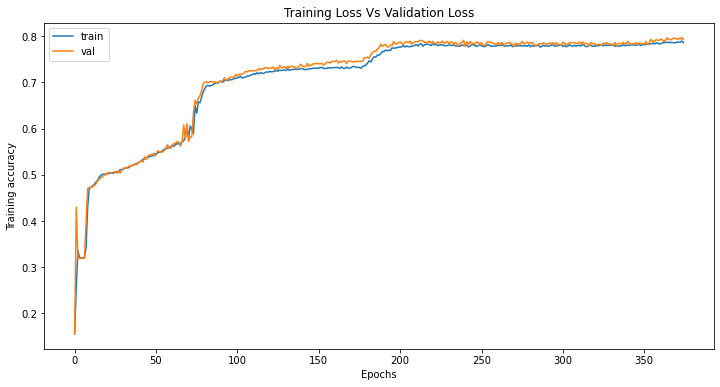

In [38]:
# Our best model
best_mlp_model = grid_search.best_estimator_
#Did the model overfit??
def plot_learning_curve(history, metric='accuracy'):
    plt.figure(figsize=(12,6))
    plt.title('Training Loss Vs Validation Loss')
    plt.plot(history.epoch, history.history['accuracy'], label='train')
    plt.plot(history.epoch, history.history['val_accuracy'], label='val')
    plt.ylabel('Training ' + metric)
    plt.xlabel('Epochs')
    plt.legend()
    
plot_learning_curve(best_mlp_model.model.history, metric='accuracy')

## Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


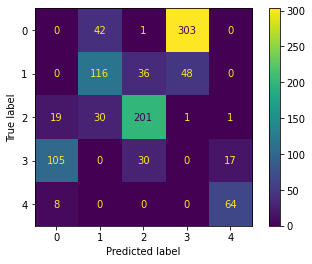

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
predictions = best_mlp_model.predict(X_test)

#3 é None
#1 é low
#2 é Medium
#0 é High
#4 é Very_High

df = pd.DataFrame(y_test, columns = [3,1,2,0,4])


new_df = df.idxmax(axis=1)

cm = confusion_matrix(new_df, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()



In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
predictions = best_mlp_model.predict(X_test)


df = pd.DataFrame(y_test, columns = [0,1,2,3,4])

new_df = df.idxmax(axis=1)
print('Accuracy:', accuracy_score(new_df, predictions))



Accuracy: 0.7720156555772995


## Criar a submission.csv

### Ver a nossa previsão

In [41]:
#Obtain predictions
predictions = best_mlp_model.predict(test_data)
predictions = predictions.reshape(predictions.shape[0], 1)
predictions[:5]

array([[3],
       [2],
       [3],
       [2],
       [3]])

#### 2 é Medium
#### 0 é High
#### 3 é None
#### 1 é low
#### 4 é Very_High



### Por fim criar o csv para submissao

In [42]:

numpy_data = np.array(predictions)
numpy_data = pd.DataFrame(numpy_data)
print(numpy_data)
numpy_data.replace(to_replace =0, value = "High", inplace = True)
numpy_data.replace(to_replace =1, value = "Low", inplace = True)
numpy_data.replace(to_replace =2, value = "Medium", inplace = True)
numpy_data.replace(to_replace =3, value = "None", inplace = True)
numpy_data.replace(to_replace =4, value = "Very_High", inplace = True)

df = numpy_data.set_axis(["Speed_Diff"], axis=1)
df.index = df.index+1
#df_t = df_t.rename(columns={"RowId":"Speed_Diff"})

df
df.to_csv("submission_NN_20k.csv", index_label='RowId')

      0
0     3
1     2
2     3
3     2
4     3
...  ..
1495  3
1496  3
1497  3
1498  4
1499  1

[1500 rows x 1 columns]
